In [112]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
data = "./data"

In [114]:
dict_data_plot={}
for game in os.listdir(data):
    if game not in dict_data_plot.keys():
        dict_data_plot[game]={}
    folder_game = os.path.join(data,game)
    for optimizer in os.listdir(folder_game):
        folder_optimizer = os.path.join(folder_game,optimizer)
        dataframe = pd.DataFrame([i for i in range(50000,1000001,50000)], columns=["Steps"])
        dcols=[]
        for seed in os.listdir(folder_optimizer):
            if "uc" in seed:
                continue
            temp = seed.split("_")
            seed_name = "_".join([temp[-2],temp[-1]])
            dcols.append(seed_name)
            dpath = os.path.join(folder_optimizer,seed,"scores.txt")
            #print(dpath)
            #print(f"{seed_name}:{seed} - {dpath}")
            score = pd.read_table(dpath, sep="\t")
            dataframe[seed_name] = score["mean"]
        dataframe["mean"] = dataframe[dcols].values.mean(axis=1)
        dataframe["std"] = dataframe[dcols].values.std(axis=1)
        dict_data_plot[game][optimizer] = dataframe[["Steps","mean","std"]].copy()

In [115]:
dict_data_plot

{'HalfCheetahv2': {'AdaBelief':       Steps          mean         std
  0     50000   4785.075386  389.537587
  1    100000   6761.735147  985.293109
  2    150000   8225.574893  866.198031
  3    200000   8997.220371  936.059605
  4    250000   9135.409629  735.890586
  5    300000   9888.352698  707.747471
  6    350000  10241.654666  859.404623
  7    400000  10252.956036  774.824757
  8    450000  10664.619187  754.336649
  9    500000  10826.635563  871.719420
  10   550000  10885.767816  837.714883
  11   600000  10985.797511  804.747670
  12   650000  11392.578224  928.548473
  13   700000  11435.284407  833.608871
  14   750000  11518.209154  888.742370
  15   800000  11453.771741  947.908355
  16   850000  11712.778252  946.958762
  17   900000  11882.824444  962.574762
  18   950000  11727.336590  929.534952
  19  1000000  11986.285322  986.240461,
  'Adam':       Steps          mean          std
  0     50000   4720.985690   258.309506
  1    100000   6810.236354   656.23819

In [116]:
dict_data_plot['HalfCheetahv2']['AdaBelief'].values

array([[5.00000000e+04, 4.78507539e+03, 3.89537587e+02],
       [1.00000000e+05, 6.76173515e+03, 9.85293109e+02],
       [1.50000000e+05, 8.22557489e+03, 8.66198031e+02],
       [2.00000000e+05, 8.99722037e+03, 9.36059605e+02],
       [2.50000000e+05, 9.13540963e+03, 7.35890586e+02],
       [3.00000000e+05, 9.88835270e+03, 7.07747471e+02],
       [3.50000000e+05, 1.02416547e+04, 8.59404623e+02],
       [4.00000000e+05, 1.02529560e+04, 7.74824757e+02],
       [4.50000000e+05, 1.06646192e+04, 7.54336649e+02],
       [5.00000000e+05, 1.08266356e+04, 8.71719420e+02],
       [5.50000000e+05, 1.08857678e+04, 8.37714883e+02],
       [6.00000000e+05, 1.09857975e+04, 8.04747670e+02],
       [6.50000000e+05, 1.13925782e+04, 9.28548473e+02],
       [7.00000000e+05, 1.14352844e+04, 8.33608871e+02],
       [7.50000000e+05, 1.15182092e+04, 8.88742370e+02],
       [8.00000000e+05, 1.14537717e+04, 9.47908355e+02],
       [8.50000000e+05, 1.17127783e+04, 9.46958762e+02],
       [9.00000000e+05, 1.18828

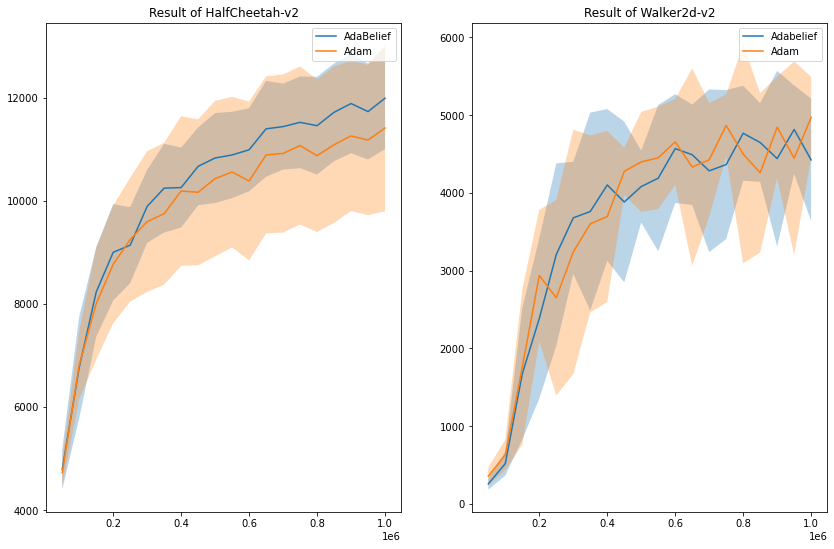

In [117]:
fig, ax = plt.subplots(1,2, figsize=(14,9))
keys = list(dict_data_plot.keys())
for i in range(2):
    k = keys[i]
    for opt in dict_data_plot[k].keys():
        mean = dict_data_plot[k][opt]["mean"].values
        std = dict_data_plot[k][opt]["std"].values
        ax[i].fill_between(dict_data_plot[k][opt]["Steps"].values,mean-std,mean+std,alpha=0.30)
        ax[i].plot(dict_data_plot[k][opt]["Steps"],mean, label=opt)
        ax[i].legend()
    name_sub = "Result of "+k[:len(k)-2]+"-"+k[-2]+k[-1]
    ax[i].set_title(name_sub)
    #ax[i].set_xscale('log', base=10)
    #ax[i].set_yscale('log', base=10)
fig.savefig("AdaBelief_RL.png")